# Importaci√≥n de Librerias

In [32]:
# An√°lisis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Gr√°ficos
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

---

In [33]:
!ls

BELLAVISTA		 dataset_magdalena.xlsx  VENTA_INMUEBLE.ipynb
dataset_bellavista.xlsx  MAGDALENA
dataset_los_olivos.xlsx  main


In [34]:
# lectura del archivo excel
df = pd.read_excel("dataset_bellavista.xlsx")

In [35]:
filas, columnas = df.shape
print("N√∫mero de filas:", filas)
print("N√∫mero de columnas:", columnas)

N√∫mero de filas: 356
N√∫mero de columnas: 12


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   A√±o                           356 non-null    int64  
 1   Trimestre                     356 non-null    int64  
 2   Precio en d√≥lares corrientes  356 non-null    float64
 3   Tipo de cambio                356 non-null    float64
 4   Distrito                      356 non-null    object 
 5   Superficie                    356 non-null    int64  
 6   N√∫mero de habitaciones        356 non-null    int64  
 7   N√∫mero de ba√±os               356 non-null    int64  
 8   N√∫mero de garajes             356 non-null    int64  
 9   Piso de ubicaci√≥n             323 non-null    float64
 10  Vista al exterior             323 non-null    float64
 11  A√±os de antig√ºedad            356 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 33.5+ 

In [37]:
df.head()

A√±o  Trimestre  Precio en d√≥lares corrientes  Tipo de cambio    Distrito  \
0  2021          1                       70000.0        3.659334  Bellavista   
1  2021          1                       56000.0        3.659334  Bellavista   
2  2021          1                      145000.0        3.659334  Bellavista   
3  2021          1                       49661.0        3.659334  Bellavista   
4  2021          1                       79000.0        3.659334  Bellavista   

   Superficie   N√∫mero de habitaciones  N√∫mero de ba√±os  N√∫mero de garajes  \
0           55                       2                1                  0   
1           80                       3                1                  0   
2          120                       4                2                  0   
3           57                       2                2                  0   
4           70                       2                2                  0   

   Piso de ubicaci√≥n  Vista al exterior  A√±os de antig√ºedad  
0                NaN                NaN                  36  
1                NaN                NaN                  25  
2                NaN                NaN                  12  
3                NaN                NaN                   7  
4                NaN                NaN                   8

In [38]:
df.isnull().sum()

A√±o                              0
Trimestre                        0
Precio en d√≥lares corrientes     0
Tipo de cambio                   0
Distrito                         0
Superficie                       0
N√∫mero de habitaciones           0
N√∫mero de ba√±os                  0
N√∫mero de garajes                0
Piso de ubicaci√≥n               33
Vista al exterior               33
A√±os de antig√ºedad               0
dtype: int64

## Eliminar columnas

**Columna Distrito**
- En los datos, todos los registros tienen el valor "Bellavista" ‚Üí no aporta variabilidad al modelo.
- Si todos los valores son iguales, esta variable no ayuda a explicar el precio

**Vista al exterior**
- Seg√∫n los datos, solo contiene "1" o vac√≠o.
- Si casi todos son "1" ‚Üí es pr√°cticamente constante, no aporta valor.

In [39]:
df.drop(["Distrito", "Vista al exterior"], axis=1, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   A√±o                           356 non-null    int64  
 1   Trimestre                     356 non-null    int64  
 2   Precio en d√≥lares corrientes  356 non-null    float64
 3   Tipo de cambio                356 non-null    float64
 4   Superficie                    356 non-null    int64  
 5   N√∫mero de habitaciones        356 non-null    int64  
 6   N√∫mero de ba√±os               356 non-null    int64  
 7   N√∫mero de garajes             356 non-null    int64  
 8   Piso de ubicaci√≥n             323 non-null    float64
 9   A√±os de antig√ºedad            356 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 27.9 KB


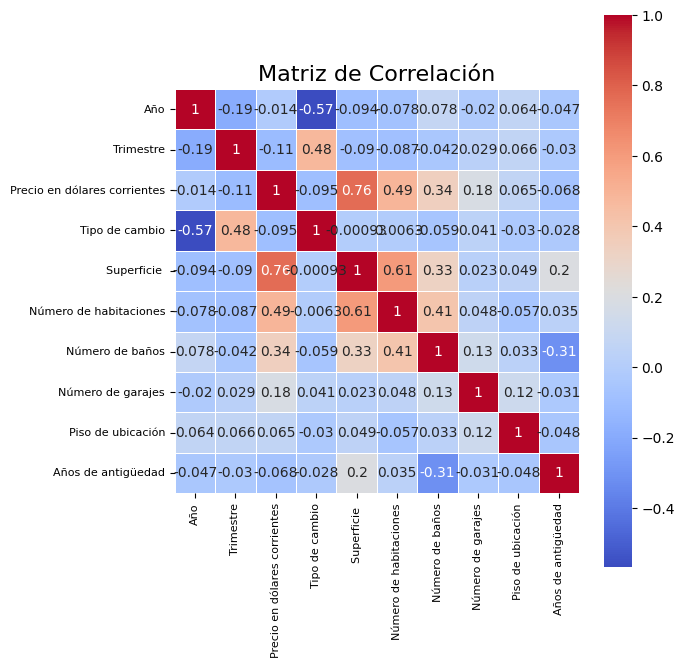

In [41]:
# Calcular la correlaci√≥n
corr = df.corr()

plt.figure(figsize=(len(corr.columns) * 0.7, len(corr.columns) * 0.7))  # ajustar tama√±o din√°mico
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    cbar=True,
    square=True,        # celdas cuadradas
    linewidths=0.5
)

plt.title("Matriz de Correlaci√≥n", fontsize=16)
plt.xticks(rotation=90, fontsize=8)   # gira labels eje X
plt.yticks(rotation=0, fontsize=8)    # labels eje Y
plt.tight_layout()
plt.show()

In [43]:
# 1. Preparar los datos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Supongamos que tu dataframe se llama df
y = df["Precio en d√≥lares corrientes"]
X = df.drop(columns=["Precio en d√≥lares corrientes"])  # quitamos el target

# 2. Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Crear pipeline con imputaci√≥n + escalado + modelo
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # reemplaza NaN por la mediana
    ("scaler", StandardScaler()),                  # normaliza
    ("model", LinearRegression())                  # regresi√≥n lineal
])

# 4. Entrenar la regresi√≥n lineal
pipeline.fit(X_train, y_train)

# 5. Ver importancia por coeficientes
coef = pipeline.named_steps["model"].coef_

importancia_coef = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": coef,
    "Influencia_abs": abs(coef)
}).sort_values(by="Influencia_abs", ascending=False)

print("üìä Importancia por coeficientes:")
print(importancia_coef)

# 6. Ver importancia por permutaci√≥n (m√°s realista)
result = permutation_importance(pipeline, X_test, y_test, n_repeats=10, random_state=42)

importancia_perm = pd.DataFrame({
    "Variable": X.columns,
    "Importancia_media": result.importances_mean,
    "Importancia_std": result.importances_std
}).sort_values(by="Importancia_media", ascending=False)

print("\nüìä Importancia por permutaci√≥n:")
print(importancia_perm)

üìä Importancia por coeficientes:
                 Variable   Coeficiente  Influencia_abs
3             Superficie   23978.439944    23978.439944
8      A√±os de antig√ºedad  -7527.133816     7527.133816
6       N√∫mero de garajes   4883.985245     4883.985245
2          Tipo de cambio  -4095.759240     4095.759240
5         N√∫mero de ba√±os  -1464.469149     1464.469149
0                     A√±o   -546.570866      546.570866
1               Trimestre    277.725582      277.725582
7       Piso de ubicaci√≥n   -258.318665      258.318665
4  N√∫mero de habitaciones    231.018199      231.018199

üìä Importancia por permutaci√≥n:
                 Variable  Importancia_media  Importancia_std
3             Superficie            1.244808         0.161302
8      A√±os de antig√ºedad           0.089316         0.031302
6       N√∫mero de garajes           0.044196         0.016259
2          Tipo de cambio           0.029815         0.018452
0                     A√±o           0.003110   

## **1. Importancia por coeficientes**

Esto viene de la f√≥rmula lineal, recuerda que escalamos antes de entrenar, as√≠ que **puedes comparar** directamente los valores absolutos:

* **Superficie (81,022)** ‚Üí Es la que m√°s influye en el precio.
* **A√±os de antig√ºedad (-23,542)** ‚Üí Tiene un peso negativo grande (a mayor antig√ºedad, menor precio).
* **N√∫mero de garajes (15,999)** ‚Üí Importante, positivo.
* Las dem√°s variables tienen efecto peque√±o comparado con las tres primeras.

üëâ Aqu√≠, la regresi√≥n te dice *qu√© direcci√≥n tiene el efecto* (positivo = sube el precio, negativo = baja el precio).

## üìä **2. Importancia por permutaci√≥n**

Esto mide cu√°nto se **deteriora el modelo** cuando desordenas cada variable:
* **Superficie (1.37)** ‚Üí Claramente es la variable que realmente hace que el modelo prediga bien.
* **A√±os de antig√ºedad (0.07)** ‚Üí Su efecto existe, pero comparado con Superficie es muy peque√±o.
* **N√∫mero de garajes (0.015)** y **Habitaciones (0.0075)** ‚Üí Influyen, pero poco.
* **Ba√±os, Piso, A√±o, Trimestre (\~0 o negativo)** ‚Üí El modelo predice igual aunque los desordene ‚Üí pr√°cticamente no aportan nada.

---

## üîé ¬øPor qu√© hay diferencia entre coeficientes y permutaci√≥n?

* Los **coeficientes** miden la relaci√≥n matem√°tica, pero no siempre significan que esa variable sea crucial en la predicci√≥n.
* La **permutaci√≥n** mide la importancia real para el modelo en datos de test ‚Üí por eso ves que ‚ÄúA√±os de antig√ºedad‚Äù tiene un coeficiente grande pero su importancia pr√°ctica es peque√±a comparada con ‚ÄúSuperficie‚Äù.

---

## Conclusi√≥n

* **Superficie** es, con diferencia, la variable que m√°s explica el precio.
* **Antig√ºedad**, **garajes** y **habitaciones** aportan algo, pero mucho menos.
* **Ba√±os, piso, a√±o, trimestre** pr√°cticamente no mejoran la predicci√≥n ‚Üí podr√≠as incluso considerar **eliminarlas** del modelo.


## 1. **Importancia por coeficientes**
Esto viene directamente de la **regresi√≥n lineal**.

* En una regresi√≥n, cada variable (`X`) tiene un **coeficiente Œ≤**.
* Ese coeficiente indica **cu√°nto cambia el target (Y)** si esa variable aumenta en 1 unidad (manteniendo las dem√°s constantes).

Ejemplo:
Si `Superficie` tiene coeficiente **500**, significa que por cada metro cuadrado extra, el precio sube **500 soles** (aprox.).

üëâ Problema:
Si las variables est√°n en distintas escalas (ej. `Superficie` en m¬≤ y `Ba√±os` en cantidad entera), no puedes compararlas directamente.
Por eso antes **escalamos** (StandardScaler), para que todas est√©n en la misma escala (media = 0, desviaci√≥n = 1).

**En resumen:**

* "Importancia por coeficientes" = mide la **relaci√≥n matem√°tica** de cada variable con el target.
* Funciona bien cuando todo est√° escalado.
* No siempre refleja la ‚Äúimportancia real‚Äù en las predicciones.

---

## 2. **Importancia por permutaci√≥n**

Esto viene de la idea:

> ‚ÄúSi desordeno los valores de una variable, ¬øcu√°nto empeora la predicci√≥n del modelo?‚Äù

C√≥mo funciona:

1. Tomas el modelo ya entrenado.
2. Calculas el error (ej. R¬≤, MSE) en el set de test.
3. Tomas una variable (ej. `Superficie`), y la **desordenas** (permutas los valores).
4. Vuelves a calcular el error.

   * Si el error **aumenta mucho** ‚Üí esa variable era importante.
   * Si el error casi no cambia ‚Üí esa variable aporta poco.

üëâ Ventaja:

* Es m√°s **realista**, porque mide el efecto real de cada variable en la calidad de predicci√≥n del modelo.
* No depende de la escala ni de supuestos lineales.

üëâ Desventaja:

* Es m√°s **lento** (porque recalcula varias veces).

---

## üìä Comparaci√≥n r√°pida

| M√©todo           | Qu√© mide                                                    | Cu√°ndo usarlo                                                           |
| ---------------- | ----------------------------------------------------------- | ----------------------------------------------------------------------- |
| **Coeficientes** | Relaci√≥n matem√°tica (Œ≤ de la regresi√≥n).                    | Para interpretar la ecuaci√≥n lineal y la direcci√≥n (positivo/negativo). |
| **Permutaci√≥n**  | Impacto real de cada variable en el rendimiento del modelo. | Para saber cu√°les son m√°s importantes en la predicci√≥n pr√°ctica.        |

---

üëâ Mi recomendaci√≥n:

* Usa **coeficientes** si quieres interpretar matem√°ticamente la regresi√≥n.
* Usa **permutaci√≥n** si quieres saber qu√© variables ‚Äúmueven la aguja‚Äù en la predicci√≥n real.

---

¬øQuieres que te muestre un **ejemplo sencillo con 2 variables** (ej. superficie y ba√±os) donde veas c√≥mo difiere la importancia por coeficiente vs permutaci√≥n?


### Matriz de correlaci√≥n

* Va de **-1 a 1**:

  * **1** ‚Üí correlaci√≥n positiva perfecta (si una sube, la otra tambi√©n).
  * **-1** ‚Üí correlaci√≥n negativa perfecta (si una sube, la otra baja).
  * **0** ‚Üí no hay relaci√≥n lineal.

* Color:

  * **Rojo** ‚Üí correlaci√≥n positiva fuerte.
  * **Azul** ‚Üí correlaci√≥n negativa.
  * **Cercano a blanco** ‚Üí casi sin relaci√≥n.

---

### Interpretaci√≥n de la matriz

1. **Variable objetivo: "Precio en soles corrientes"**

   * `Superficie` ‚Üí **0.79** ‚Üí **alta correlaci√≥n positiva**.
     üìå Significa que a mayor superficie, mayor precio ‚Üí es la variable m√°s importante.
   * `N√∫mero de habitaciones` ‚Üí **0.53** ‚Üí correlaci√≥n positiva moderada.
     üìå M√°s habitaciones suelen implicar mayor precio.
   * `N√∫mero de ba√±os` ‚Üí **0.37** ‚Üí correlaci√≥n positiva moderada-baja.
   * `A√±os de antig√ºedad` ‚Üí **0.20** ‚Üí correlaci√≥n baja, pero positiva.
   * `Trimestre`, `Piso de ubicaci√≥n`, `N√∫mero de garajes`, `A√±o` ‚Üí correlaci√≥n muy baja, casi nula.
     üìå No parecen aportar mucha informaci√≥n para explicar el precio.

---

2. **Relaciones entre variables predictoras**

   * `Superficie` y `N√∫mero de habitaciones` ‚Üí **0.61** ‚Üí fuerte relaci√≥n (tiene sentido: m√°s grande la vivienda, m√°s habitaciones).
   * `N√∫mero de habitaciones` y `N√∫mero de ba√±os` ‚Üí **0.41** ‚Üí moderada, suelen crecer juntas.
   * `N√∫mero de ba√±os` y `A√±os de antig√ºedad` ‚Üí **-0.31** ‚Üí ligera correlaci√≥n negativa, viviendas m√°s nuevas tienden a tener m√°s ba√±os.

---

3. **Variables poco √∫tiles**

   * `Trimestre`, `Piso de ubicaci√≥n` y `N√∫mero de garajes` ‚Üí correlaciones muy cercanas a 0 con el precio ‚Üí probablemente no agreguen mucho valor en un modelo lineal.
   * Pero ojo: que no haya correlaci√≥n lineal **no significa que no tengan alg√∫n efecto no lineal** (podr√≠an ser √∫tiles en modelos no lineales).

---

### Conclusi√≥n

* Las variables m√°s relevantes para predecir el precio son:
  **Superficie > Habitaciones > Ba√±os > Antig√ºedad**.
* Se puede considerar eliminar o dar menos peso a:
  **Trimestre, A√±o, Piso de ubicaci√≥n, N√∫mero de garajes** (al menos en un modelo lineal).


In [44]:
df.head()

A√±o  Trimestre  Precio en d√≥lares corrientes  Tipo de cambio  Superficie   \
0  2021          1                       70000.0        3.659334           55   
1  2021          1                       56000.0        3.659334           80   
2  2021          1                      145000.0        3.659334          120   
3  2021          1                       49661.0        3.659334           57   
4  2021          1                       79000.0        3.659334           70   

   N√∫mero de habitaciones  N√∫mero de ba√±os  N√∫mero de garajes  \
0                       2                1                  0   
1                       3                1                  0   
2                       4                2                  0   
3                       2                2                  0   
4                       2                2                  0   

   Piso de ubicaci√≥n  A√±os de antig√ºedad  
0                NaN                  36  
1                NaN                  25  
2                NaN                  12  
3                NaN                   7  
4                NaN                   8

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   A√±o                           356 non-null    int64  
 1   Trimestre                     356 non-null    int64  
 2   Precio en d√≥lares corrientes  356 non-null    float64
 3   Tipo de cambio                356 non-null    float64
 4   Superficie                    356 non-null    int64  
 5   N√∫mero de habitaciones        356 non-null    int64  
 6   N√∫mero de ba√±os               356 non-null    int64  
 7   N√∫mero de garajes             356 non-null    int64  
 8   Piso de ubicaci√≥n             323 non-null    float64
 9   A√±os de antig√ºedad            356 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 27.9 KB


In [46]:
# Contar valores vac√≠os por columna
df.isnull().sum()

A√±o                              0
Trimestre                        0
Precio en d√≥lares corrientes     0
Tipo de cambio                   0
Superficie                       0
N√∫mero de habitaciones           0
N√∫mero de ba√±os                  0
N√∫mero de garajes                0
Piso de ubicaci√≥n               33
A√±os de antig√ºedad               0
dtype: int64

In [47]:
# 3. Rellenar NaN con la media de cada columna
df = df.fillna(df.mean(numeric_only=True))

In [48]:
# df = pd.get_dummies(df, columns=["Distrito"], drop_first=True)

## Entrenamiento

In [49]:
X = df.drop(columns=["Precio en d√≥lares corrientes"])
y = df["Precio en d√≥lares corrientes"]
# X = df.drop(columns=["Precio en soles corrientes"])
# y = df["Precio en soles corrientes"]

In [50]:
from sklearn.model_selection import train_test_split

# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [51]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()
# Ajustar (entrenar) el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [52]:
# Predecir sobre el set de prueba
y_pred = model.predict(X_test)

In [53]:
y_pred

array([ 63423.80474614,  61387.71317477, 118434.83419237, 111270.09940315,
        63418.00272957,  49772.21868049, 107260.22049007,  88616.56837516,
        61924.41947409, 110036.05984922,  84846.95707526,  65592.46354248,
        73315.43731082,  63205.48422824,  55562.50944754,  77039.43974926,
        79261.02099597,  64984.56789007,  67729.98207552,  77673.10910973,
        71548.14152708,  86964.16011075, 122234.70389046,  40504.01180491,
       109524.75971121, 132968.38276036,  85316.790809  ,  96150.95460411,
        56497.38839104,  95020.70311141,  55924.00780744,  92842.90374347,
        65628.06524865, 126021.07277527,  89746.56494601,  53392.00221356,
        78489.66733866,  82418.46954058,  79536.49135048,  88722.36902348,
       140082.93365649,  95525.92646406,  93151.23070574,  77673.10910973,
        92379.56927032,  54386.07094137, 106438.08783748,  71247.98602946,
        79463.14333269, 118664.78850401,  79000.69722934,  57113.67066331,
        57113.67066331,  

In [54]:
import pandas as pd

# Crear un DataFrame comparando valores reales vs predichos
resultados = pd.DataFrame({
    "Real": y_test.values,
    "Predicho": y_pred,
    "Diferencia": y_test.values - y_pred
})

print(resultados)  # mostrar las primeras filas


             Real       Predicho    Diferencia
0    45000.000000   63423.804746 -18423.804746
1    69000.000000   61387.713175   7612.286825
2   171617.614208  118434.834192  53182.780015
3   135000.000000  111270.099403  23729.900597
4    60000.000000   63418.002730  -3418.002730
5    75000.000000   49772.218680  25227.781320
6   123000.000000  107260.220490  15739.779510
7    85000.000000   88616.568375  -3616.568375
8    72900.000000   61924.419474  10975.580526
9   137000.000000  110036.059849  26963.940151
10   82000.000000   84846.957075  -2846.957075
11   75000.000000   65592.463542   9407.536458
12   75000.000000   73315.437311   1684.562689
13   35900.000000   63205.484228 -27305.484228
14   49000.000000   55562.509448  -6562.509448
15   79000.000000   77039.439749   1960.560251
16   46500.000000   79261.020996 -32761.020996
17   50000.000000   64984.567890 -14984.567890
18   70000.000000   67729.982076   2270.017924
19   67000.000000   77673.109110 -10673.109110
20   85000.00

## Evaluar el modelo

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Error cuadr√°tico medio
mse = mean_squared_error(y_test, y_pred)

# Ra√≠z del error cuadr√°tico medio
rmse = np.sqrt(mse)

# R¬≤ (qu√© tan bien explica la varianza de y)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R¬≤:", r2)

MSE: 257723514.62093672
RMSE: 16053.769483237784
R¬≤: 0.6631810993465082


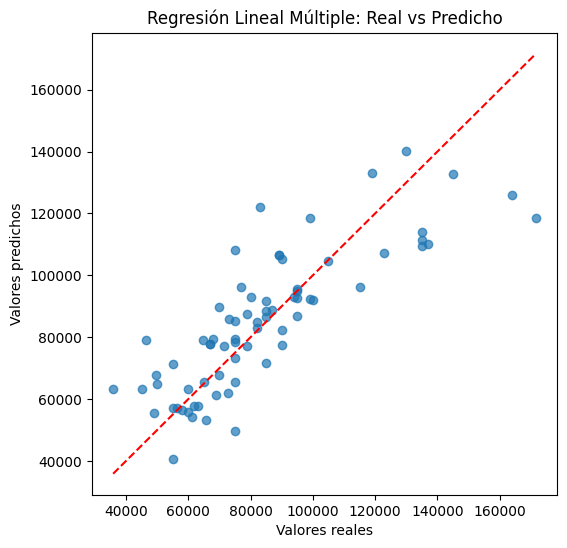

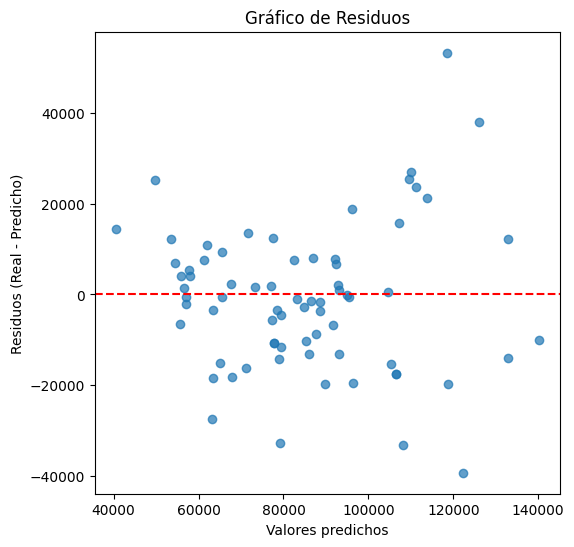

In [56]:
import matplotlib.pyplot as plt

# --- 1. Gr√°fico Real vs Predicho ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # l√≠nea ideal
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Regresi√≥n Lineal M√∫ltiple: Real vs Predicho")
plt.show()

# --- 2. Gr√°fico de Residuos ---
residuos = y_test - y_pred

plt.figure(figsize=(6,6))
plt.scatter(y_pred, residuos, alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valores predichos")
plt.ylabel("Residuos (Real - Predicho)")
plt.title("Gr√°fico de Residuos")
plt.show()


### **1. Gr√°fico Real vs Predicho (arriba)**

* **Qu√© muestra**: En el eje X est√°n los valores reales (`y_test`), y en el eje Y los valores predichos (`y_pred`).
* **La l√≠nea roja discontinua**: Representa la **l√≠nea ideal** donde las predicciones coinciden exactamente con los valores reales (`y = x`).
* **Interpretaci√≥n**:

  * Mientras m√°s cerca est√©n los puntos de esa l√≠nea, mejor el modelo.
  * Si los puntos se dispersan mucho, significa que el modelo tiene errores de predicci√≥n en esos casos.
  * En el gr√°fico se ve una tendencia clara siguiendo la l√≠nea ‚Üí el modelo **s√≠ captura la relaci√≥n** entre las variables, aunque hay cierta dispersi√≥n (errores).

---

### **2. Gr√°fico de Residuos (abajo)**

* **Qu√© muestra**: En el eje X est√°n los valores predichos, y en el eje Y los residuos (`valor real - valor predicho`).
* **La l√≠nea roja horizontal**: Representa el **cero** ‚Üí el punto donde el valor predicho es igual al valor real.
* **Interpretaci√≥n**:

  * Los residuos deber√≠an estar distribuidos de manera aleatoria alrededor de 0.
  * Si ves un patr√≥n (por ejemplo, forma de curva, abanico, o tendencia), significa que el modelo no est√° captando toda la estructura de los datos.
  * En tu caso, los residuos parecen estar dispersos sin un patr√≥n evidente ‚Üí lo cual es **buena se√±al**, indica que la regresi√≥n lineal es razonable para tus datos.
  * Sin embargo, hay valores con residuos grandes (positivos y negativos), lo que muestra que **en algunos casos el modelo se equivoca bastante**.

---

‚úÖ **Conclusi√≥n general de tus gr√°ficos**:

* Tu modelo de regresi√≥n lineal m√∫ltiple est√° capturando la relaci√≥n (los puntos siguen una tendencia lineal).
* Los residuos no muestran un patr√≥n sistem√°tico ‚Üí no parece haber una fuerte violaci√≥n de los supuestos de linealidad.
* S√≠ hay errores grandes en ciertos casos ‚Üí quiz√°s podr√≠as mejorar el modelo agregando m√°s variables explicativas, transformaciones o probando modelos m√°s complejos.

---

¬øQuieres que te explique tambi√©n **qu√© supuestos de la regresi√≥n lineal** se pueden verificar con estos gr√°ficos? (por ejemplo: homocedasticidad, linealidad, independencia, normalidad de errores).


In [57]:
# cu√°nto influye cada variable en el precio
coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": model.coef_
})
print(coeficientes.sort_values(by="Coeficiente", ascending=False))

                 Variable   Coeficiente
6       N√∫mero de garajes  11654.011608
3             Superficie     980.535122
4  N√∫mero de habitaciones    361.870344
1               Trimestre    237.749246
0                     A√±o   -488.678391
8      A√±os de antig√ºedad   -544.153768
7       Piso de ubicaci√≥n  -2138.912416
5         N√∫mero de ba√±os  -2574.630558
2          Tipo de cambio -38363.672226


In [59]:
import joblib

# Guardar el modelo entrenado en un archivo .pkl
joblib.dump(model, "dataset_bellavista.pkl")

['dataset_bellavista.pkl']

In [60]:
!ls

BELLAVISTA		 dataset_los_olivos.xlsx  main
dataset_bellavista.pkl	 dataset_magdalena.xlsx   VENTA_INMUEBLE.ipynb
dataset_bellavista.xlsx  MAGDALENA


---

---

In [61]:
# Cargar el modelo desde el archivo .pkl
modelo_cargado = joblib.load("dataset_bellavista.pkl")

# Ahora puedes usarlo directamente
y_pred = modelo_cargado.predict(X_test)

In [62]:
y_pred

array([ 63423.80474614,  61387.71317477, 118434.83419237, 111270.09940315,
        63418.00272957,  49772.21868049, 107260.22049007,  88616.56837516,
        61924.41947409, 110036.05984922,  84846.95707526,  65592.46354248,
        73315.43731082,  63205.48422824,  55562.50944754,  77039.43974926,
        79261.02099597,  64984.56789007,  67729.98207552,  77673.10910973,
        71548.14152708,  86964.16011075, 122234.70389046,  40504.01180491,
       109524.75971121, 132968.38276036,  85316.790809  ,  96150.95460411,
        56497.38839104,  95020.70311141,  55924.00780744,  92842.90374347,
        65628.06524865, 126021.07277527,  89746.56494601,  53392.00221356,
        78489.66733866,  82418.46954058,  79536.49135048,  88722.36902348,
       140082.93365649,  95525.92646406,  93151.23070574,  77673.10910973,
        92379.56927032,  54386.07094137, 106438.08783748,  71247.98602946,
        79463.14333269, 118664.78850401,  79000.69722934,  57113.67066331,
        57113.67066331,  

In [63]:
X_test

A√±o  Trimestre  Tipo de cambio  Superficie   N√∫mero de habitaciones  \
227  2023          2        3.699146           51                       2   
42   2021          3        4.044573           74                       3   
256  2023          4        3.780165          120                       4   
182  2023          1        3.818142          131                       4   
56   2021          3        4.044573           72                       2   
333  2024          4        3.755779           48                       1   
15   2021          1        3.659334           94                       3   
57   2021          3        4.044573           94                       3   
140  2022          4        3.894966           56                       2   
294  2024          2        3.742923          108                       3   
82   2022          1        3.806333           76                       2   
168  2023          1        3.818142           57                       2   
352  2025          1        3.699348           64                       2   
309  2024          3        3.757980           55                       2   
119  2022          3        3.891228           64                       1   
334  2024          4        3.755779           69                       1   
317  2024          3        3.757980           74                       2   
145  2022          4        3.894966           70                       3   
340  2025          1        3.699348           65                       3   
299  2024          2        3.742923           70                       3   
126  2022          4        3.894966           58                       3   
219  2023          2        3.699146           81                       3   
239  2023          3        3.674333          134                       4   
33   2021          3        4.044573           51                       2   
158  2022          4        3.894966          131                       4   
245  2023          3        3.674333          128                       4   
278  2024          1        3.759223           87                       3   
321  2024          3        3.757980           94                       2   
25   2021          2        3.794436           60                       2   
73   2021          4        4.023874           98                       4   
210  2023          2        3.699146           60                       2   
9    2021          1        3.659334           70                       2   
343  2025          1        3.699348           68                       3   
147  2022          4        3.894966          121                       3   
139  2022          4        3.894966           89                       3   
39   2021          3        4.044573           61                       3   
22   2021          2        3.794436           68                       2   
194  2023          1        3.818142           86                       3   
94   2022          2        3.748333           75                       3   
90   2022          1        3.806333           70                       3   
177  2023          1        3.818142          130                       3   
30   2021          2        3.794436           90                       3   
302  2024          2        3.742923           91                       2   
286  2024          2        3.742923           70                       3   
347  2025          1        3.699348           72                       3   
172  2023          1        3.818142           60                       2   
55   2021          3        4.044573          104                       3   
5    2021          1        3.659334           70                       2   
45   2021          3        4.044573           83                       3   
223  2023          2        3.699146          112                       4   
335  2024          4        3.755779           73                       2   


---

In [ ]:
df_nuevo = pd.read_excel("b1.xlsx")
df_nuevo.drop(["Distrito", "Vista al exterior"], axis=1, inplace=True)
df_nuevo = df_nuevo.fillna(df_nuevo.mean(numeric_only=True))

In [159]:
# Separar X (las features) -> NO debe incluir "Precio en soles corrientes"
X_new = df_nuevo.drop(columns=["Precio en soles corrientes"], errors="ignore")

y_pred = modelo_cargado.predict(X_new)

In [160]:
y_pred

array([488182.11939131])